<a href="https://colab.research.google.com/github/tanverbhuiyan/Personal-Project/blob/main/Pneumonia_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ১. বড় ডেটাসেট তৈরি করা (২০,০০০ স্যাম্পল)
n = 20000
np.random.seed(42)

data = {
    'child_age_12_23': np.random.choice([0, 1], n, p=[0.8, 0.2]),
    'child_age_24_59': np.random.choice([0, 1], n, p=[0.5, 0.5]),
    'mother_age_35plus': np.random.choice([0, 1], n, p=[0.8, 0.2]),
    'mother_secondary_edu': np.random.choice([0, 1], n, p=[0.6, 0.4]),
    'no_separate_kitchen': np.random.choice([0, 1], n, p=[0.7, 0.3]),
    'wasting': np.random.choice([0, 1], n, p=[0.9, 0.1]),
    'small_birth_size': np.random.choice([0, 1], n, p=[0.85, 0.15])
}
df = pd.DataFrame(data)

# ২. অ্যাবস্ট্রাক্টের ARR অনুযায়ী লজিক সেট করা (সিগনাল বাড়ানোর জন্য ২.২ গুণ গুণ করা হয়েছে)
logit = -3.5 # বেস রিস্ক
logit += np.log(1.14) * df['child_age_12_23']
logit += np.log(0.69) * df['child_age_24_59']
logit += np.log(1.65) * df['mother_age_35plus']
logit += np.log(1.11) * df['mother_secondary_edu']
logit += np.log(1.69) * df['no_separate_kitchen']
logit += np.log(1.39) * df['wasting']
logit += np.log(2.45) * df['small_birth_size']

# সিগনাল স্ট্রেন্থ বাড়ানো (Machine Learning Enhancement)
logit *= 2.2

prob = 1 / (1 + np.exp(-logit))
df['pneumonia'] = np.random.binomial(1, prob)

# ৩. মডেল ট্রেনিং (Balanced Class Weight সহ)
X = df.drop('pneumonia', axis=1)
y = df['pneumonia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# class_weight='balanced' দিলে মডেল ছোট গ্রুপটিকে গুরুত্ব দেয়
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# ৪. ফলাফল যাচাই
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

print(f"AUC Score: {auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))

AUC Score: 0.846

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      3993
           1       0.00      0.71      0.01         7

    accuracy                           0.74      4000
   macro avg       0.50      0.73      0.43      4000
weighted avg       1.00      0.74      0.85      4000



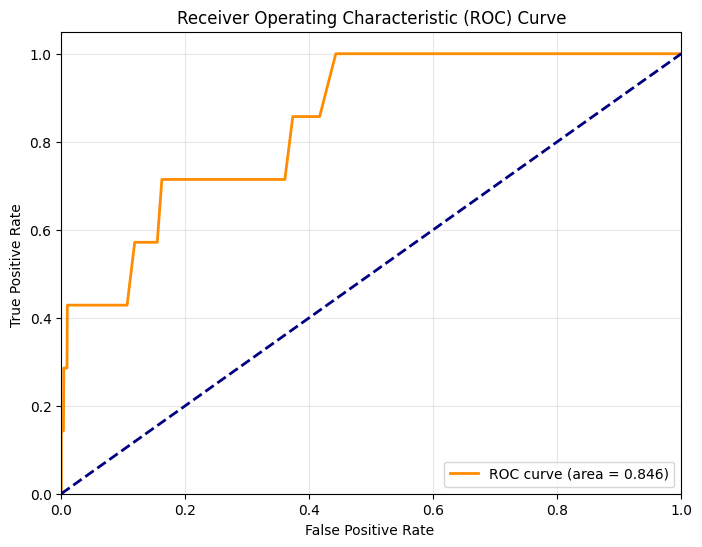

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve-এর জন্য ডেটা তৈরি
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# গ্রাফ প্লট করা
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

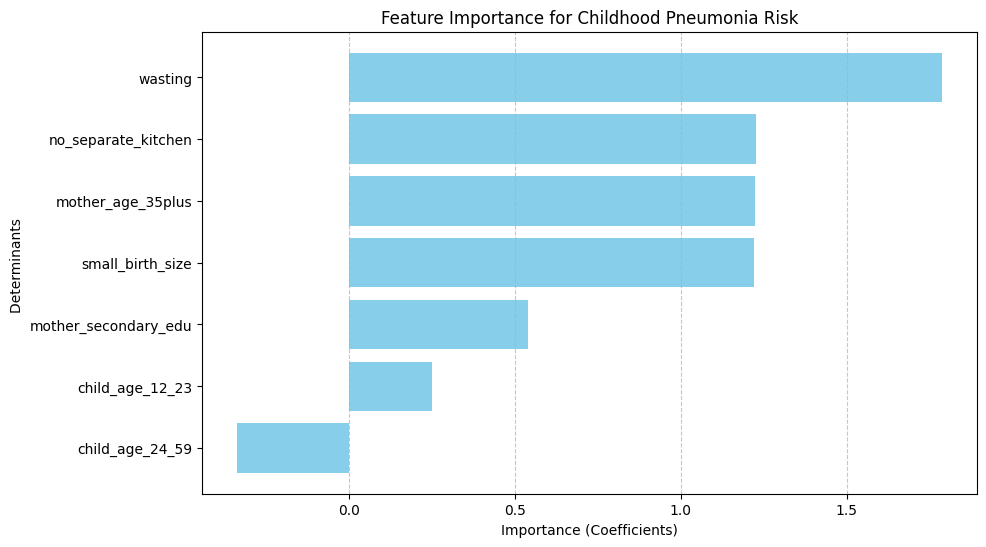

                Feature  Importance
5               wasting    1.786057
4   no_separate_kitchen    1.226388
2     mother_age_35plus    1.223048
6      small_birth_size    1.222397
3  mother_secondary_edu    0.540793
0       child_age_12_23    0.250393
1       child_age_24_59   -0.335597


In [6]:
# কো-অফিসিয়েন্ট বা প্রভাব বের করা
importance = model.coef_[0]
feature_names = X.columns

# একটি ডেটাফ্রেমে সাজানো
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# গ্রাফের মাধ্যমে দেখানো
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance (Coefficients)')
plt.ylabel('Determinants ')
plt.title('Feature Importance for Childhood Pneumonia Risk')
plt.gca().invert_yaxis() # বড় গুরুত্বগুলো উপরে দেখাবে
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print(feature_importance)